# Libraries

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.tree import _tree, plot_tree


from imblearn.over_sampling import RandomOverSampler

# Load & Split Dataset

In [83]:
df = pd.read_csv("/content/df_cleaned.csv")
df

,last_pymnt_d,total_rec_prncp,last_pymnt_amnt,out_prncp,total_rec_late_fee,last_fico_range_high,installment,loan_amnt,total_rec_int,out_prncp_inv,...,funded_amnt_inv,recoveries,debt_settlement_flag,hardship_flag,mo_sin_old_rev_tl_op,revol_util,dti,all_util,annual_inc,loan_status
0,17,-0.332581,-0.372797,0.420080,-0.261895,0.281611,-0.473027,-0.461473,0.413942,0.420298,...,-0.461004,-0.445598,0,0,-0.307356,0.608376,0.558953,0.915820,-1.203816,0
1,31,-0.840560,-0.473603,-0.629220,-0.261895,1.244049,-1.608631,-1.601510,-1.081823,-0.629167,...,-1.601271,-0.445598,0,0,-0.187187,-1.880835,-1.233491,-0.049124,0.274631,1
2,27,-0.250720,-0.222228,2.263937,-0.261895,0.883135,1.252073,1.058575,-0.380182,2.264445,...,1.059353,-0.445598,0,0,-0.980297,0.431193,-0.223328,0.379740,2.227297,1
3,39,-0.458023,0.161605,-0.629220,-0.261895,0.161306,-1.364264,-1.373503,-0.909433,-0.629167,...,-1.373218,-0.445598,0,0,-1.472987,0.314511,-0.337836,0.433348,-1.231711,1
4,5,-0.415519,0.220569,-0.629220,-0.261895,0.221459,-1.317547,-1.348168,-0.834440,-0.629167,...,-1.347878,-0.445598,0,0,0.738107,1.273894,0.117928,1.559116,-0.841178,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119281,36,1.072123,0.066746,-0.629220,-0.261895,0.822982,-0.473196,-0.461473,-0.593052,-0.629167,...,-0.461004,-0.445598,0,0,0.353569,0.720736,-0.931916,0.111700,4.179963,1
119282,26,0.475587,-0.417190,-0.629220,-0.261895,-1.462808,1.079697,0.555059,1.491599,-0.629167,...,0.555735,-0.445598,0,0,-0.727944,0.405263,-0.997673,2.309628,1.390440,0
119283,27,-0.983894,-0.414521,0.132695,-0.261895,1.003439,-0.951061,-1.078993,-0.949884,0.132868,...,-1.078649,-0.445598,0,0,2.336344,-0.109001,0.109992,-0.746028,-1.426978,1
119284,13,0.639197,-0.321768,-0.629220,3.433568,-0.981589,0.636417,1.311917,2.824325,-0.629167,...,1.312745,-0.445598,1,0,-0.259288,-0.484975,-0.158705,-0.049124,0.001258,0


In [84]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

## Feature Selection (skipped to make fair comparison)

In [85]:
# # Scale features to [0,1] for Chi-Squared
# scaler = MinMaxScaler()
# X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [86]:
# # Chi-Squared Feature Selection
# selector = SelectKBest(score_func=chi2, k='all')
# selector.fit(X_scaled, y)

In [87]:
# # Select features with p-value < 0.01
# p_values = selector.pvalues_
# selected_features = X_scaled.columns[p_values < 0.01]
# X_selected = X_scaled[selected_features]

# print(f"Selected Features (p < 0.01): {list(selected_features)}")

## Split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Apply Random Oversampling to Training Data (skipped to make fair comparison)

In [89]:
# oversampler = RandomOverSampler(random_state=42)
# X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train, y_train)

# Random Forest Classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

def train_and_evaluate_random_forest(X_train, X_test, y_train, y_test, n_estimators=100, criterion='gini', random_state=42):
    """
    Train and evaluate a Random Forest model.

    Parameters:
    - X_train, X_test: Features for training and testing
    - y_train, y_test: Labels for training and testing
    - n_estimators (int): Number of trees (default 100)
    - criterion (str): Splitting criterion ('gini' or 'entropy', default 'gini')
    - random_state (int): Random seed (default 42)

    Returns:
    - rf_model: Trained Random Forest model
    """

    # Train Random Forest
    rf_model = RandomForestClassifier(
        n_estimators=n_estimators,
        criterion=criterion,
        random_state=random_state
    )
    rf_model.fit(X_train, y_train)

    # Predictions
    y_pred = rf_model.predict(X_test)
    y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

    # Evaluation Metrics
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))

    # Confusion Matrix: [ [TN, FP], [FN, TP] ]
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    sensitivity = tp / (tp + fn)  # True Positive Rate
    specificity = tn / (tn + fp)  # True Negative Rate

    print(f"Sensitivity (True Positive Rate): {sensitivity:.4f}")
    print(f"Specificity (True Negative Rate): {specificity:.4f}")

    return rf_model


In [91]:
rf_model = train_and_evaluate_random_forest(X_train, X_test, y_train, y_test, n_estimators=100)


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     17285
           1       0.99      0.99      0.99     18501

    accuracy                           0.99     35786
   macro avg       0.99      0.99      0.99     35786
weighted avg       0.99      0.99      0.99     35786

ROC AUC Score: 0.9993123513935882
Sensitivity (True Positive Rate): 0.9915
Specificity (True Negative Rate): 0.9891


# performance visualization

## Learning Curve

In [92]:
def plot_learning_curve(estimator, X, y, title='Learning Curve'):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', label='Cross-validation score')
    plt.title(title)
    plt.xlabel('Training examples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

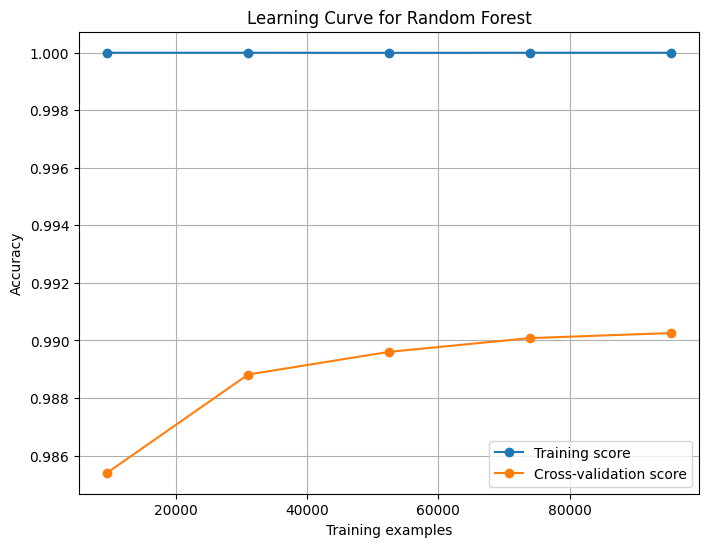

In [93]:
plot_learning_curve(rf_model, X, y, title='Learning Curve for Random Forest')

* Moderate Overfitting

# Interpretability


--- Tree 1 ---
Node   | Feature            | Gini Reduction
---------------------------------------------
0      | last_pymnt_d       | 0.0769
1      | funded_amnt_inv    | 0.0151
2      | all_util           | 0.0064
3      | total_rec_prncp    | 0.1815
4      | loan_amnt          | 0.0657
5      | last_fico_range_high | 0.3250
6      | recoveries         | 0.0037
7      | total_rec_prncp    | 0.0690
8      | mo_sin_old_rev_tl_op | 0.0109
9      | total_rec_int      | -0.0059
10     | mo_sin_old_rev_tl_op | 0.0607
11     | funded_amnt_inv    | 0.2037
12     | mo_sin_old_rev_tl_op | 0.4444
16     | all_util           | 0.0143
18     | total_rec_prncp    | 0.5000
21     | dti                | 0.0021
22     | last_fico_range_high | 0.5000
26     | last_pymnt_amnt    | 0.5000
31     | out_prncp          | 0.0167
32     | last_fico_range_high | 0.0276
33     | recoveries         | 0.2580
34     | total_pymnt        | 0.1510
36     | total_rec_prncp    | 0.0024
37     | total_rec_prncp    |

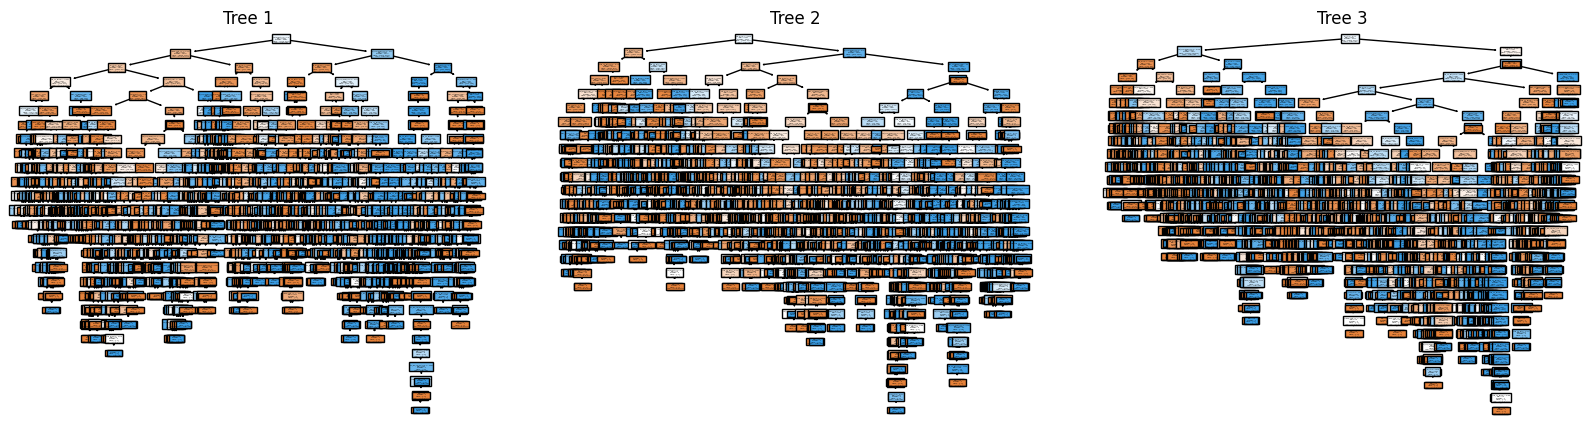

In [96]:
import matplotlib.pyplot as plt
from sklearn.tree import _tree

def calculate_gini(p):
    return 1 - sum(p_i ** 2 for p_i in p)

def get_node_gini_reduction(tree, feature_names):
    """Calculate and print Gini reduction at each split in the tree."""
    tree_ = tree.tree_
    feature = tree_.feature
    impurity = tree_.impurity
    n_node_samples = tree_.n_node_samples

    print("Node   | Feature            | Gini Reduction")
    print("---------------------------------------------")

    for node in range(tree_.node_count):
        if feature[node] != _tree.TREE_UNDEFINED:
            left_child = tree_.children_left[node]
            right_child = tree_.children_right[node]

            # Weighted impurity of children
            n_total = n_node_samples[node]
            weighted_impurity = (
                (n_node_samples[left_child] / n_total) * impurity[left_child]
                + (n_node_samples[right_child] / n_total) * impurity[right_child]
            )
            gini_reduction = impurity[node] - weighted_impurity
            print(f"{node:<6} | {feature_names[feature[node]]:<18} | {gini_reduction:.4f}")

# Example usage:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

for i, ax in enumerate(axes):
    print(f"\n--- Tree {i+1} ---")
    get_node_gini_reduction(rf_model.estimators_[i], X.columns)

    # (optional) you can still plot the trees side-by-side:
    plot_tree(rf_model.estimators_[i], feature_names=X.columns, class_names=["Not Terminated", "Terminated"], filled=True, ax=ax)
    ax.set_title(f"Tree {i+1}")

plt.show()

=== Random Forest Interpretation ===
Number of Trees: 100

*** Global Feature Importance (Gini-based) ***
last_fico_range_high: 0.3669
last_pymnt_d: 0.1289
recoveries: 0.0945
out_prncp: 0.0893
last_pymnt_amnt: 0.0825
out_prncp_inv: 0.0676
total_rec_prncp: 0.0493
total_pymnt: 0.0224
funded_amnt_inv: 0.0151
total_rec_late_fee: 0.0151
loan_amnt: 0.0143
installment: 0.0121
total_rec_int: 0.0101
debt_settlement_flag: 0.0095
revol_util: 0.0040
dti: 0.0039
mo_sin_old_rev_tl_op: 0.0038
all_util: 0.0037
annual_inc: 0.0037
hardship_flag: 0.0031

*** Key Splits in Trees (Highest Gini Reduction) ***

--- Tree 1 ---
Best Split: Node 18 on 'total_rec_prncp'
Gini Reduction: 0.5000
Samples: 2


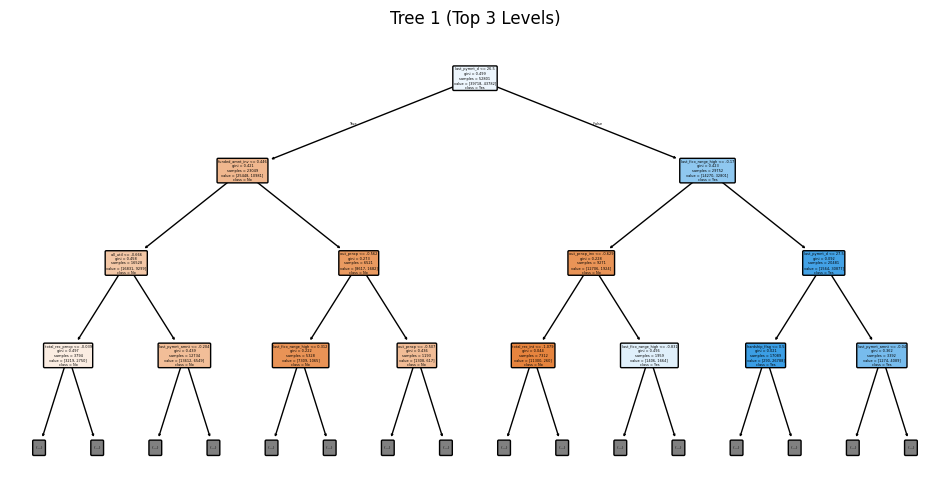


--- Tree 2 ---
Best Split: Node 50 on 'total_rec_prncp'
Gini Reduction: 0.5000
Samples: 7


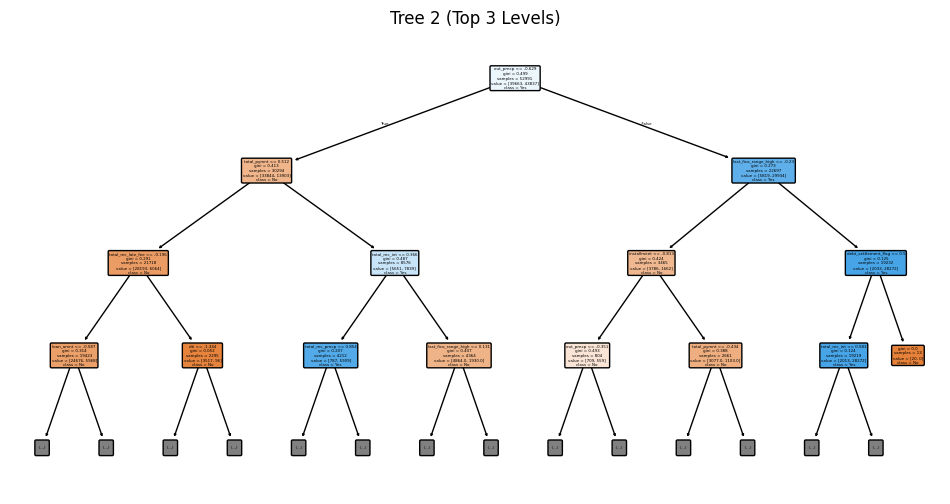


--- Tree 3 ---
Best Split: Node 17 on 'mo_sin_old_rev_tl_op'
Gini Reduction: 0.5000
Samples: 2


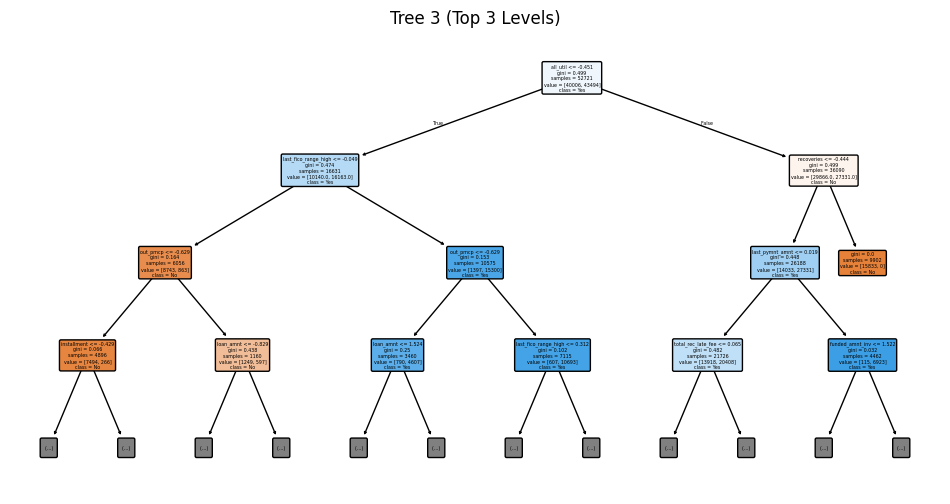

In [99]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

def interpret_random_forest(rf_model, feature_names, class_names=None, max_trees_to_show=3):
    """
    Simplified Random Forest interpreter.

    Args:
        rf_model: Trained RandomForestClassifier or RandomForestRegressor.
        feature_names: List of feature names (e.g., X.columns).
        class_names: List of class names (for classification). Default=None.
        max_trees_to_show: Max number of trees to visualize. Default=3.
    """
    print("=== Random Forest Interpretation ===")
    print(f"Number of Trees: {len(rf_model.estimators_)}")

    # --- Feature Importance ---
    print("\n*** Global Feature Importance (Gini-based) ***")
    for feature, importance in sorted(
        zip(feature_names, rf_model.feature_importances_),
        key=lambda x: -x[1]
    ):
        print(f"{feature}: {importance:.4f}")

    # --- Analyze Individual Trees ---
    print("\n*** Key Splits in Trees (Highest Gini Reduction) ***")
    for i, tree in enumerate(rf_model.estimators_[:max_trees_to_show]):
        print(f"\n--- Tree {i+1} ---")
        tree_ = tree.tree_

        # Find the split with max Gini reduction
        best_node = None
        best_reduction = -1
        best_feature = None

        for node in range(tree_.node_count):
            if tree_.feature[node] != -2:  # Not a leaf node
                left = tree_.children_left[node]
                right = tree_.children_right[node]

                n_total = tree_.n_node_samples[node]
                weighted_impurity = (
                    (tree_.n_node_samples[left] / n_total) * tree_.impurity[left] +
                    (tree_.n_node_samples[right] / n_total) * tree_.impurity[right]
                )
                gini_reduction = tree_.impurity[node] - weighted_impurity

                if gini_reduction > best_reduction:
                    best_reduction = gini_reduction
                    best_node = node
                    best_feature = feature_names[tree_.feature[node]]

        print(
            f"Best Split: Node {best_node} on '{best_feature}'\n"
            f"Gini Reduction: {best_reduction:.4f}\n"
            f"Samples: {tree_.n_node_samples[best_node]}"
        )

        # Plot the tree (optional)
        plt.figure(figsize=(12, 6))
        plot_tree(
            tree,
            feature_names=feature_names,
            class_names=class_names,
            filled=True,
            rounded=True,
            max_depth=3  # Limit depth for readability
        )
        plt.title(f"Tree {i+1} (Top 3 Levels)")
        plt.show()

# Example Usage:
interpret_random_forest(rf_model, X.columns, class_names=["No", "Yes"])